In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
#imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
from scipy import stats

from numpy import *
from scipy import *

import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
import arrow
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
infil = loadtxt('./grl2016.raw')
# crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10] 
ox = infil[:,11]*44.6596 #mL per L to umol/L
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]


#density and salinity in g/kg
dens = seawater.dens(S,T,P)
sal_conv = S * 35.16504/35

# CONVERT FROM UMOL TO MMOL/M3
alk_conv=alk*dens/1000
dic_conv=dic*dens/1000
sal_conv = S * 35.16504/35

mask_jdf_dic = (((dic_qf==2) | (dic_qf==6)) & (ln == 5))
mask_jdf_alk = (((alk_qf==2) | (alk_qf==6)) & (ln == 5))
mask_jdf_ox = (((ox_qf==2) | (ox_qf==6)) & (ln == 5) & ~np.isnan(ox))
totobs = (np.size(dic[mask_jdf_dic]))



In [6]:
print(np.shape(dic))

(860,)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


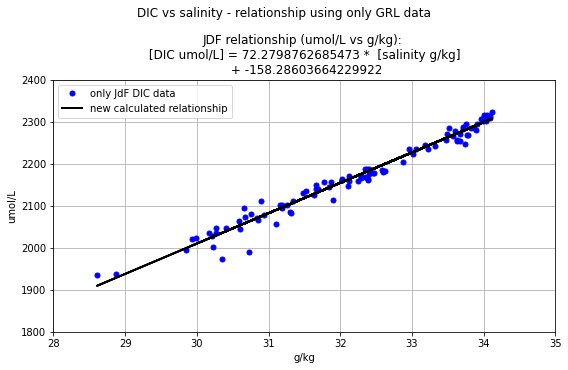

dic final values
slope, intercept umol/L vs g/kg (GRL data only): 72.2798762685473, -158.28603664229922


In [7]:
from scipy import stats 
smalltit = ['JdF','n. Strait', 's. Strait', 'Haro/Puget']
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 13*fact), facecolor='w', edgecolor='k')

sal_JDFconv = sal_conv[mask_jdf_dic]
dic_JDFconv = dic_conv[mask_jdf_dic]
#axs.plot(sal_SSconv, dic_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea DIC data')
axs.plot(sal_JDFconv, dic_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF DIC data')
GRLslope_conv, GRLintercept_conv, r_value, p_value, std_err = stats.linregress(sal_JDFconv,dic_JDFconv)
line = GRLslope_conv*sal_JDFconv+GRLintercept_conv
line2 = 74.48873*sal_JDFconv- 232.9
axs.plot(sal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')

oldline = 68.98 * sal_JDFconv - 100.14
#axs.plot(sal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[DIC umol/kg] = 68.98 * [salinity conv]  -100.14
axs.set_title(f'JDF relationship (umol/L vs g/kg): \n [DIC umol/L] = {GRLslope_conv} *  [salinity g/kg] \n + {GRLintercept_conv}' )
axs.legend()
axs.set_xlim([28,35]); axs.set_ylim([1800,2400]); axs.grid()
axs.set_xlabel('g/kg');axs.set_ylabel('umol/L')

fig.set_facecolor('w')
plt.suptitle('DIC vs salinity - relationship using only GRL data')
plt.tight_layout()
plt.show()

print('dic final values')
print(f'slope, intercept umol/L vs g/kg (GRL data only): {GRLslope_conv}, {GRLintercept_conv}')


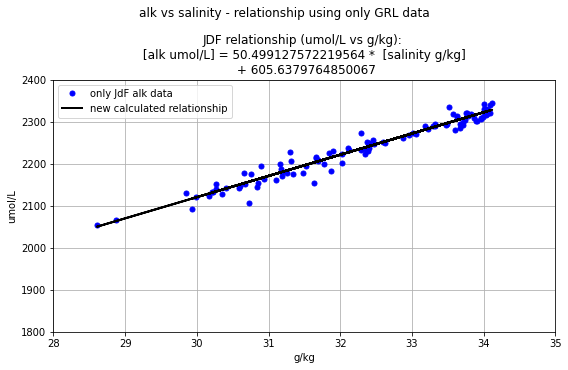

alk final values
slope, intercept umol/L vs g/kg (GRL data only): 50.499127572219564, 605.6379764850067


In [8]:
from scipy import stats 
smalltit = ['JdF','n. Strait', 's. Strait', 'Haro/Puget']
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 13*fact), facecolor='w', edgecolor='k')

sal_JDFconv = sal_conv[mask_jdf_alk]
alk_JDFconv = alk_conv[mask_jdf_alk]
#axs.plot(sal_SSconv, alk_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea alk data')
axs.plot(sal_JDFconv, alk_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF alk data')
GRLslope_conv, GRLintercept_conv, r_value, p_value, std_err = stats.linregress(sal_JDFconv,alk_JDFconv)
line = GRLslope_conv*sal_JDFconv+GRLintercept_conv
line2 = 74.48873*sal_JDFconv- 232.9
axs.plot(sal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')

oldline = 68.98 * sal_JDFconv - 100.14
#axs.plot(sal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[alk umol/kg] = 68.98 * [salinity conv]  -100.14
axs.set_title(f'JDF relationship (umol/L vs g/kg): \n [alk umol/L] = {GRLslope_conv} *  [salinity g/kg] \n + {GRLintercept_conv}' )
axs.legend()
axs.set_xlim([28,35]); axs.set_ylim([1800,2400]); axs.grid()
axs.set_xlabel('g/kg');axs.set_ylabel('umol/L')

fig.set_facecolor('w')
plt.suptitle('alk vs salinity - relationship using only GRL data')
plt.tight_layout()
plt.show()

print('alk final values')
print(f'slope, intercept umol/L vs g/kg (GRL data only): {GRLslope_conv}, {GRLintercept_conv}')


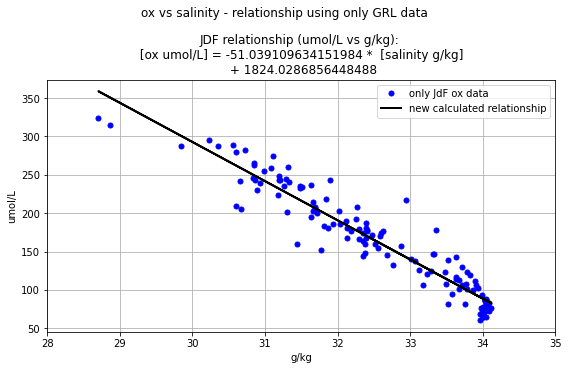

ox final values
slope, intercept umol/L vs g/kg (GRL data only): -51.039109634151984, 1824.0286856448488


In [9]:
from scipy import stats 
smalltit = ['JdF','n. Strait', 's. Strait', 'Haro/Puget']
fact = 0.4
fig, axs = plt.subplots(1,1, figsize=(20*fact, 13*fact), facecolor='w', edgecolor='k')
ox_conv = ox
sal_JDFconv = sal_conv[mask_jdf_ox ]
ox_JDFconv = ox_conv[mask_jdf_ox]
#axs.plot(sal_SSconv, ox_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea ox data')
axs.plot(sal_JDFconv, ox_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF ox data')
GRLslope_conv, GRLintercept_conv, r_value, p_value, std_err = stats.linregress(sal_JDFconv,ox_JDFconv)
line = GRLslope_conv*sal_JDFconv+GRLintercept_conv
line2 = 74.48873*sal_JDFconv- 232.9
axs.plot(sal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')

oldline = 68.98 * sal_JDFconv - 100.14
#axs.plot(sal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[ox umol/kg] = 68.98 * [salinity conv]  -100.14
axs.set_title(f'JDF relationship (umol/L vs g/kg): \n [ox umol/L] = {GRLslope_conv} *  [salinity g/kg] \n + {GRLintercept_conv}' )
axs.legend()
axs.set_xlim([28,35]); axs.grid()
axs.set_xlabel('g/kg');axs.set_ylabel('umol/L')

fig.set_facecolor('w')
plt.suptitle('ox vs salinity - relationship using only GRL data')
plt.tight_layout()
plt.show()

print('ox final values')
print(f'slope, intercept umol/L vs g/kg (GRL data only): {GRLslope_conv}, {GRLintercept_conv}')


# check 

In [10]:
sal = 30



print('OLD DIC REL')
print('DIC umol/kg vs psu rel: [DIC umol/kg] = 68.98 * [salinity psu]  -100.14')
print('DIC (umol/kg)at salinity 30 (psu):')
print(68.98 * sal - 100.14)
print('NEW DIC REL')
print('slope, intercept umol/L vs g/kg (GRL data only): 72.2798762685473, -158.28603664229922')
print('DIC (umol/L)at salinity 30 (g/kg):')
print(72.2798762685473 * sal - 158.28603664229922) 
print()
print('OLD TA REL')
print('TA umol/kg vs psu rel: [TA umol/kg] = 68.98 * [salinity psu]  -100.14')
print('TA (umol/kg)at salinity 30 (psu):')
print(46.99 * sal + 666.62)
print('NEW TA REL')
print('slope, intercept umol/L vs g/kg (GRL data only): 50.499127572219564, 605.6379764850067')
print('TA (umol/L)at salinity 30 (g/kg):')
print(50.499127572219564 * sal +  605.6379764850067) 
print('')
print('OLD OXY REL')
print('OXY umol/kg vs psu rel: [OXY umol/L] = -49.54 * [salinity psu]  + 1763.29')
print('OXY (umol/L)at salinity 30 (psu):')
print(-49.54 * sal + 1763.29)
print('NEW OXY REL')
print('slope, intercept umol/L vs g/kg (GRL data only): -51.039109634151984, 1824.0286856448488')
print('OXY (umol/L)at salinity 30 (kg):')
print(-51.039109634151984 * sal +  1824.0286856448488) 

OLD DIC REL
DIC umol/kg vs psu rel: [DIC umol/kg] = 68.98 * [salinity psu]  -100.14
DIC (umol/kg)at salinity 30 (psu):
1969.26
NEW DIC REL
slope, intercept umol/L vs g/kg (GRL data only): 72.2798762685473, -158.28603664229922
DIC (umol/L)at salinity 30 (g/kg):
2010.1102514141198

OLD TA REL
TA umol/kg vs psu rel: [TA umol/kg] = 68.98 * [salinity psu]  -100.14
TA (umol/kg)at salinity 30 (psu):
2076.32
NEW TA REL
slope, intercept umol/L vs g/kg (GRL data only): 50.499127572219564, 605.6379764850067
TA (umol/L)at salinity 30 (g/kg):
2120.6118036515936

OLD OXY REL
OXY umol/kg vs psu rel: [OXY umol/L] = -49.54 * [salinity psu]  + 1763.29
OXY (umol/L)at salinity 30 (psu):
277.0899999999999
NEW OXY REL
slope, intercept umol/L vs g/kg (GRL data only): -51.039109634151984, 1824.0286856448488
OXY (umol/L)at salinity 30 (kg):
292.8553966202892
